In [1]:
#importing required packages
import os
from email.parser import Parser
import pandas as pd

import math
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob as tb

In [2]:
#Initializing dataframes
datedf=pd.DataFrame([['name',0,0,0,0,0,0,0]],
                    columns=['Name','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
ndatedf=pd.DataFrame([['name',0,0,0,0,0,0,0]],
                    columns=['Name','Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
bloblist=[]

In [3]:
#Get current working directory
cwd = os.getcwd()
#Check if folder exists in 'maildir' directory
parent_directory="Input Data"
if os.path.exists(cwd+"/"+parent_directory):
    path=cwd+"/"+parent_directory
    if os.path.exists(path+'/enron_mail_20150507/maildir'):
        path=path+'/enron_mail_20150507/maildir'
        #traversing through various directories, subdirectories and files
        for directory, subdirectory, filenames in  os.walk(path):
            satcount=suncount=moncount=tuecount=wedcount=thurcount=fricount=0
            for filename in filenames:
                with open(os.path.join(directory, filename), "r") as f:
                    data = f.read()

                email = Parser().parsestr(data)
                if email['date'][:3] == 'Sat':
                    satcount=+1
                elif email['date'][:3] == 'Sun':
                    suncount+=1
                elif email['date'][:3] == 'Mon':
                    moncount+=1
                elif email['date'][:3] == 'Tue':
                    tuecount+=1
                elif email['date'][:3] == 'Wed':
                    wedcount+=1
                elif email['date'][:3] == 'Thu':
                    thurcount+=1
                elif email['date'][:3] == 'Fri':
                    fricount+=1
            
                if (directory[94:].split('\\')[0] == 'kean-s') and (email['date'][:3] =='Sat' or email['date'][:3]=='Sun'):
                    bloblist.append(tb(email.get_payload()))
            
            ndatedf['Name']=directory[94:].split('\\')[0]
            ndatedf['Saturday']=satcount
            ndatedf['Sunday']=suncount
            ndatedf['Monday']=moncount
            ndatedf['Tuesday']=tuecount
            ndatedf['Wednesday']=wedcount
            ndatedf['Thursday']=thurcount
            ndatedf['Friday']=fricount

            datedf=pd.concat([datedf,ndatedf])
        print('File imported')
    else:
        print("File does not exist")
else:
    print('Path does not exist.')

File imported


In [4]:
#drop the first row containing 
datedf=datedf[2:]

In [5]:
result=datedf.groupby('Name').sum().reset_index().sort_values(['Sunday','Saturday'],ascending=False)

In [6]:
result[:10]

,Name,Saturday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday
56,kean-s,35,1231,4198,4727,5164,4702,4920
19,dasovich-j,17,722,5296,6065,5736,5281,4690
108,sanders-r,19,549,1332,1367,1428,1300,1205
55,kaminski-v,26,516,5830,5779,5201,4904,5873
62,lavorato-j,10,514,866,907,897,698,638
72,mann-k,17,490,4342,5437,4825,4432,3720
66,linder-e,4,375,441,371,418,377,466
1,arnold-j,9,359,1031,933,1049,865,589
41,guzman-m,4,355,1219,1073,1063,962,1100
12,campbell-l,10,285,1082,1269,1192,1270,1211


In [7]:
result.to_csv(cwd+"/Output/WeekendMails.csv")

In [ ]:
#We perform this analysis to filter out people who have been actively working and sending and receiving mails even on weekends.
#From this analysis, we can list down and track emails from a specific list of people instead of implementing the algorithms for all 150 executives.

In [8]:
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)

def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))

def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [9]:
word_corp=''
for i, blob in enumerate(bloblist):
    #print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:1]:
        word_corp=word_corp + word + ' '
        #print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
print("TF-IDF generated for all files")

TF-IDF generated for all files


In [10]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('wordclouds.png', facecolor='k', bbox_inches='tight')

In [11]:
wordcloud = WordCloud(width=900, height=500).generate(word_corp)

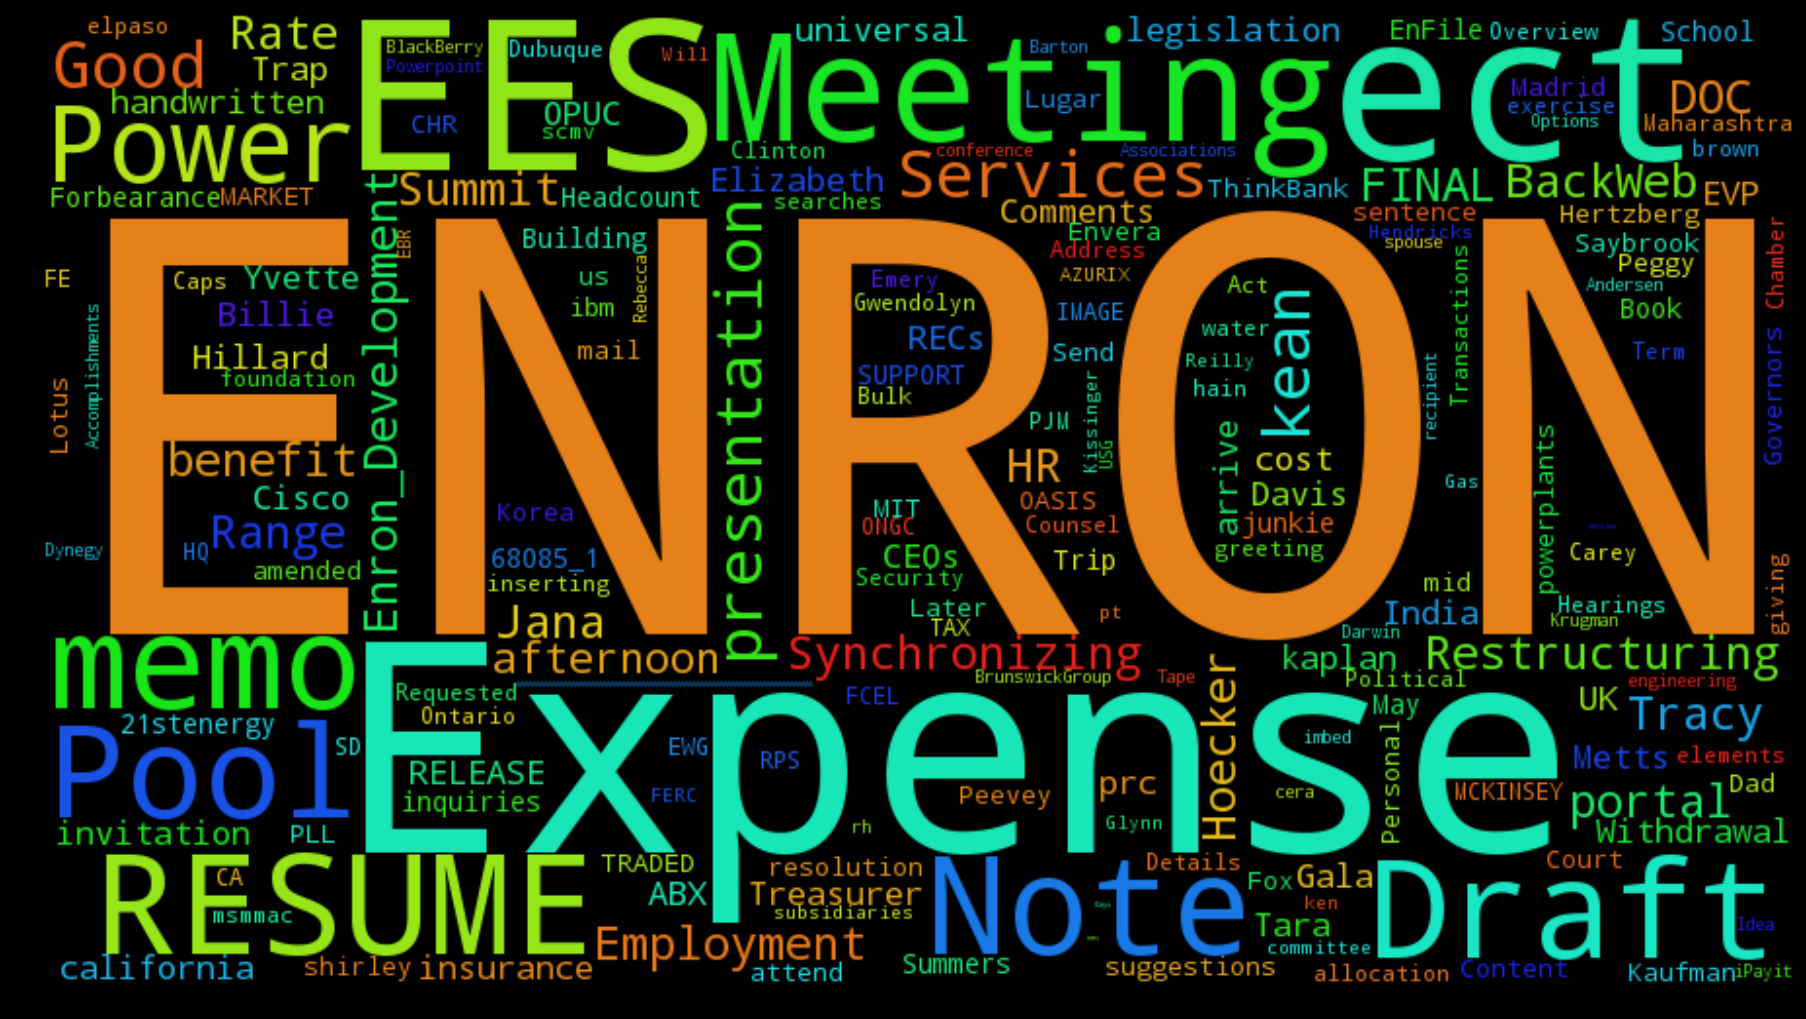

In [12]:
plot_Cloud(wordcloud)